In [82]:
#imports
import os
from google.colab import drive 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [83]:
#point to google drive
drive.mount('/drive', force_remount=True)
shared_drive_team ="/drive/MyDrive/Project/Dataset"
os.chdir(shared_drive_team)

Mounted at /drive


In [84]:
project_id = 'dataminingproject-364904'

In [85]:
!gcloud config list project
!gcloud config set project 'dataminingproject-364904'

[core]
project = dataminingproject-364904

Your active configuration is: [default]
Updated property [core/project].


In [86]:
!gcloud config list project

[core]
project = dataminingproject-364904

Your active configuration is: [default]


In [87]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [88]:
from google.cloud import bigquery

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
client = bigquery.Client(project=project_id)

#Print your current data
for dataset in client.list_datasets():
  print(dataset.dataset_id)

CrimeCA
zillow_property_value


In [89]:
sql = """
SELECT
    *
FROM
    `dataminingproject-364904.zillow_property_value.Final_Processed`
"""
dfquery = client.query(sql)

In [90]:
df=dfquery.to_dataframe()

In [91]:
df.columns

Index(['State', 'County', 'latitude', 'longitude', 'rent', 'month',
       'Annual_Average_Employment', 'Annual_Average_Pay', 'Industry', 'NAICS',
       'State_Name_Full', 'Year'],
      dtype='object')

In [92]:
df=df[['State', 'County', 'latitude', 'longitude', 'rent','Annual_Average_Employment', 'Annual_Average_Pay', 'Industry', 'NAICS','State_Name_Full']]
df

,State,County,latitude,longitude,rent,Annual_Average_Employment,Annual_Average_Pay,Industry,NAICS,State_Name_Full
0,AL,Autauga County,32.532237,-86.646439,1593.302056,2129,61660,goods-producing,101,Alabama
1,AL,Autauga County,32.532237,-86.646439,1593.302056,176,72310,natural resources and mining,1011,Alabama
2,AL,Autauga County,32.532237,-86.646439,1593.302056,468,50631,construction,1012,Alabama
3,AL,Autauga County,32.532237,-86.646439,1593.302056,1485,63874,manufacturing,1013,Alabama
4,AL,Autauga County,32.532237,-86.646439,1593.302056,6478,37274,service-providing,102,Alabama
...,...,...,...,...,...,...,...,...,...,...
9468,WY,Sweetwater County,41.660328,-108.875677,1165.189652,1037,50567,professional and business services,1024,Wyoming
9469,WY,Sweetwater County,41.660328,-108.875677,1165.189652,1320,34963,education and health services,1025,Wyoming
9470,WY,Sweetwater County,41.660328,-108.875677,1165.189652,2320,17833,leisure and hospitality,1026,Wyoming
9471,WY,Sweetwater County,41.660328,-108.875677,1165.189652,432,35212,other services,1027,Wyoming


#  Clusters of counties which have high average pay, employment while have very less average rent. This is to make sure we have list of best places before we apply for a job.

## Ref https://github.com/ttimong/blog-posts/blob/master/blog1-kmeans-clustering/final_model.ipynb

In [93]:
df['Ticker']=df['State']+'_'+df['County']+'_'+df['Industry']

In [94]:
df

,State,County,latitude,longitude,rent,Annual_Average_Employment,Annual_Average_Pay,Industry,NAICS,State_Name_Full,Ticker
0,AL,Autauga County,32.532237,-86.646439,1593.302056,2129,61660,goods-producing,101,Alabama,AL_Autauga County_goods-producing
1,AL,Autauga County,32.532237,-86.646439,1593.302056,176,72310,natural resources and mining,1011,Alabama,AL_Autauga County_natural resources and mining
2,AL,Autauga County,32.532237,-86.646439,1593.302056,468,50631,construction,1012,Alabama,AL_Autauga County_construction
3,AL,Autauga County,32.532237,-86.646439,1593.302056,1485,63874,manufacturing,1013,Alabama,AL_Autauga County_manufacturing
4,AL,Autauga County,32.532237,-86.646439,1593.302056,6478,37274,service-providing,102,Alabama,AL_Autauga County_service-providing
...,...,...,...,...,...,...,...,...,...,...,...
9468,WY,Sweetwater County,41.660328,-108.875677,1165.189652,1037,50567,professional and business services,1024,Wyoming,WY_Sweetwater County_professional and business...
9469,WY,Sweetwater County,41.660328,-108.875677,1165.189652,1320,34963,education and health services,1025,Wyoming,WY_Sweetwater County_education and health serv...
9470,WY,Sweetwater County,41.660328,-108.875677,1165.189652,2320,17833,leisure and hospitality,1026,Wyoming,WY_Sweetwater County_leisure and hospitality
9471,WY,Sweetwater County,41.660328,-108.875677,1165.189652,432,35212,other services,1027,Wyoming,WY_Sweetwater County_other services


In [95]:
df_in=df[['Ticker','rent','Annual_Average_Pay','Annual_Average_Employment']]
df_in

,Ticker,rent,Annual_Average_Pay,Annual_Average_Employment
0,AL_Autauga County_goods-producing,1593.302056,61660,2129
1,AL_Autauga County_natural resources and mining,1593.302056,72310,176
2,AL_Autauga County_construction,1593.302056,50631,468
3,AL_Autauga County_manufacturing,1593.302056,63874,1485
4,AL_Autauga County_service-providing,1593.302056,37274,6478
...,...,...,...,...
9468,WY_Sweetwater County_professional and business...,1165.189652,50567,1037
9469,WY_Sweetwater County_education and health serv...,1165.189652,34963,1320
9470,WY_Sweetwater County_leisure and hospitality,1165.189652,17833,2320
9471,WY_Sweetwater County_other services,1165.189652,35212,432


In [96]:
df_in['rent']=df_in['rent']*12
df_in['payrentratio']=df_in['rent']/df_in['Annual_Average_Pay']

<ipython-input-96-667a2d71ce95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in['rent']=df_in['rent']*12
<ipython-input-96-667a2d71ce95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in['payrentratio']=df_in['rent']/df_in['Annual_Average_Pay']


In [97]:
df_in

,Ticker,rent,Annual_Average_Pay,Annual_Average_Employment,payrentratio
0,AL_Autauga County_goods-producing,19119.624672,61660,2129,0.310081
1,AL_Autauga County_natural resources and mining,19119.624672,72310,176,0.264412
2,AL_Autauga County_construction,19119.624672,50631,468,0.377627
3,AL_Autauga County_manufacturing,19119.624672,63874,1485,0.299333
4,AL_Autauga County_service-providing,19119.624672,37274,6478,0.512948
...,...,...,...,...,...
9468,WY_Sweetwater County_professional and business...,13982.275823,50567,1037,0.27651
9469,WY_Sweetwater County_education and health serv...,13982.275823,34963,1320,0.399916
9470,WY_Sweetwater County_leisure and hospitality,13982.275823,17833,2320,0.784068
9471,WY_Sweetwater County_other services,13982.275823,35212,432,0.397088


In [98]:
df_in=df_in.loc[df_in['Annual_Average_Pay']!=0]
df_in

,Ticker,rent,Annual_Average_Pay,Annual_Average_Employment,payrentratio
0,AL_Autauga County_goods-producing,19119.624672,61660,2129,0.310081
1,AL_Autauga County_natural resources and mining,19119.624672,72310,176,0.264412
2,AL_Autauga County_construction,19119.624672,50631,468,0.377627
3,AL_Autauga County_manufacturing,19119.624672,63874,1485,0.299333
4,AL_Autauga County_service-providing,19119.624672,37274,6478,0.512948
...,...,...,...,...,...
9468,WY_Sweetwater County_professional and business...,13982.275823,50567,1037,0.27651
9469,WY_Sweetwater County_education and health serv...,13982.275823,34963,1320,0.399916
9470,WY_Sweetwater County_leisure and hospitality,13982.275823,17833,2320,0.784068
9471,WY_Sweetwater County_other services,13982.275823,35212,432,0.397088


In [99]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics


In [100]:
def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

In [101]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(score.round(2)))
    print("sse withing cluster: " + str(round(sse_within_cluster)))
    
    return df


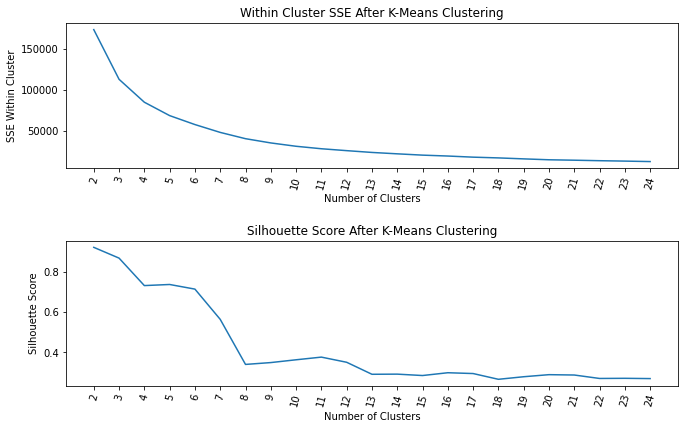

In [102]:
plot_cluster(df_in, max_loop=25)


In [104]:
first_trial = apply_cluster(df_in, clusters=8)


clustering performance
-----------------------------------
silhouette score: 0.34
sse withing cluster: 40269


<ipython-input-101-69be3332248b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.labels_


In [107]:
first_trial

,Ticker,rent,Annual_Average_Pay,Annual_Average_Employment,payrentratio,cluster
0,AL_Autauga County_goods-producing,19119.624672,61660,2129,0.310081,3
1,AL_Autauga County_natural resources and mining,19119.624672,72310,176,0.264412,3
2,AL_Autauga County_construction,19119.624672,50631,468,0.377627,3
3,AL_Autauga County_manufacturing,19119.624672,63874,1485,0.299333,3
4,AL_Autauga County_service-providing,19119.624672,37274,6478,0.512948,0
...,...,...,...,...,...,...
9468,WY_Sweetwater County_professional and business...,13982.275823,50567,1037,0.27651,3
9469,WY_Sweetwater County_education and health serv...,13982.275823,34963,1320,0.399916,3
9470,WY_Sweetwater County_leisure and hospitality,13982.275823,17833,2320,0.784068,0
9471,WY_Sweetwater County_other services,13982.275823,35212,432,0.397088,3


In [108]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"Annual_Average_Pay":"mean", "rent":"mean","payrentratio":"mean", "Ticker":"count"})
    .sort_values('payrentratio')
    .reset_index()
)

cluster_perf_df


,cluster,Annual_Average_Pay,rent,payrentratio,Ticker
0,3,63016.941779,18073.091380,0.301161,6149
1,1,89145.0,28864.987724,0.335778,6
2,2,78557.616883,26057.578471,0.378312,154
3,4,69842.403509,23819.164435,0.380329,741
4,5,78086.877551,29214.634124,0.406555,49
5,7,75504.0,34667.662452,0.45915,1
6,0,36680.039311,23464.604701,0.678598,2264
7,6,67495.384615,274937.366332,4.364429,13


In [109]:
first_row = cluster_perf_df.iloc[0]
first_row['cluster']

3

In [110]:
# creating a dataframe that only consists of cluster `0`
df_in_sub = df_in.query("cluster == "+str(first_row['cluster'])).reset_index(drop=True)

In [111]:
df_in_sub

,Ticker,rent,Annual_Average_Pay,Annual_Average_Employment,payrentratio,cluster
0,AL_Autauga County_goods-producing,19119.624672,61660,2129,0.310081,3
1,AL_Autauga County_natural resources and mining,19119.624672,72310,176,0.264412,3
2,AL_Autauga County_construction,19119.624672,50631,468,0.377627,3
3,AL_Autauga County_manufacturing,19119.624672,63874,1485,0.299333,3
4,AL_Autauga County_information,19119.624672,64710,22,0.295466,3
...,...,...,...,...,...,...
6144,WY_Sweetwater County_financial activities,13982.275823,55053,552,0.253978,3
6145,WY_Sweetwater County_professional and business...,13982.275823,50567,1037,0.27651,3
6146,WY_Sweetwater County_education and health serv...,13982.275823,34963,1320,0.399916,3
6147,WY_Sweetwater County_other services,13982.275823,35212,432,0.397088,3


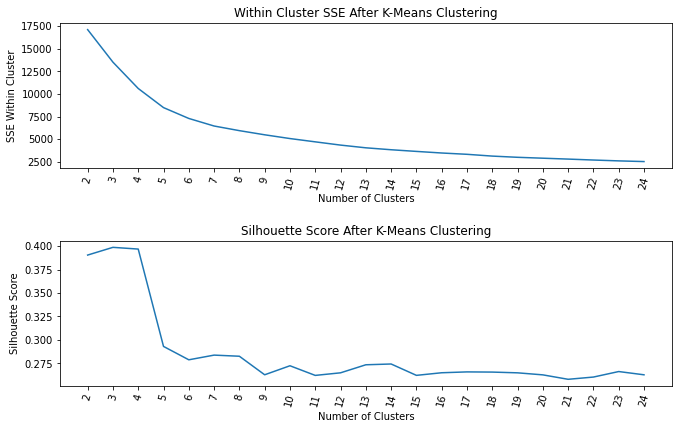

In [112]:
plot_cluster(df_in_sub, max_loop=25)


In [113]:
second_trial= apply_cluster(df_in_sub, clusters=9)


clustering performance
-----------------------------------
silhouette score: 0.26
sse withing cluster: 5481


In [114]:
sub_cluster_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"Annual_Average_Pay":"mean", "rent":"mean","payrentratio":"mean", "Ticker":"count"})
    .sort_values('payrentratio')
    .reset_index()
)

sub_cluster_perf_df


,cluster,Annual_Average_Pay,rent,payrentratio,Ticker
0,4,1216848.0,20191.224412,0.016593,1
1,8,245563.894737,25458.111162,0.110291,19
2,2,123282.310078,26596.403649,0.2218,258
3,0,56999.787781,12889.457571,0.227925,1555
4,5,80845.790451,18216.707607,0.228614,754
5,7,83014.962536,23265.394905,0.285825,347
6,3,53261.560498,17265.859869,0.328864,562
7,6,43717.580315,15736.445137,0.361687,1270
8,1,62146.684743,23301.067791,0.377701,1383


In [115]:
first_row = sub_cluster_perf_df.iloc[0]

second_row=sub_cluster_perf_df.iloc[1]
second_row["cluster"]

8

In [116]:
query="cluster == "+str(first_row["cluster"])+" | cluster== "+str(second_row["cluster"])
query

'cluster == 4 | cluster== 8'

In [117]:
df_in_sub

,Ticker,rent,Annual_Average_Pay,Annual_Average_Employment,payrentratio,cluster
0,AL_Autauga County_goods-producing,19119.624672,61660,2129,0.310081,1
1,AL_Autauga County_natural resources and mining,19119.624672,72310,176,0.264412,5
2,AL_Autauga County_construction,19119.624672,50631,468,0.377627,6
3,AL_Autauga County_manufacturing,19119.624672,63874,1485,0.299333,1
4,AL_Autauga County_information,19119.624672,64710,22,0.295466,1
...,...,...,...,...,...,...
6144,WY_Sweetwater County_financial activities,13982.275823,55053,552,0.253978,0
6145,WY_Sweetwater County_professional and business...,13982.275823,50567,1037,0.27651,0
6146,WY_Sweetwater County_education and health serv...,13982.275823,34963,1320,0.399916,6
6147,WY_Sweetwater County_other services,13982.275823,35212,432,0.397088,6


In [118]:
df_in_sub_best = df_in_sub.query(query).reset_index(drop=True)
df_in_sub_best

,Ticker,rent,Annual_Average_Pay,Annual_Average_Employment,payrentratio,cluster
0,CA_Merced County_unclassified,23561.249638,265134,1,0.088865,8
1,CA_San Luis Obispo County_unclassified,32865.780029,311560,0,0.105488,8
2,CA_Alameda County_information,35592.700983,216252,18367,0.164589,8
3,CA_San Mateo County_manufacturing,41961.907210,201842,25186,0.207895,8
4,CA_San Mateo County_financial activities,41961.907210,295119,22619,0.142186,8
5,CT_Fairfield County_information,33334.937686,189273,12402,0.176121,8
6,CT_Windham County_unclassified,15970.817024,220796,1,0.072333,8
7,FL_Pasco County_information,24918.788972,199214,1073,0.125086,8
8,KY_Oldham County_unclassified,16153.844556,216022,4,0.074779,8
9,MD_Montgomery County_information,26779.132507,237768,9073,0.112627,8


In [119]:
best_tickers=df_in_sub_best['Ticker'].unique()
best_tickers

array(['CA_Merced County_unclassified',
       'CA_San Luis Obispo County_unclassified',
       'CA_Alameda County_information',
       'CA_San Mateo County_manufacturing',
       'CA_San Mateo County_financial activities',
       'CT_Fairfield County_information',
       'CT_Windham County_unclassified', 'FL_Pasco County_information',
       'KY_Oldham County_unclassified',
       'MD_Montgomery County_information',
       'MN_Sherburne County_unclassified',
       'NJ_Somerset County_information', 'OH_Lake County_unclassified',
       'OR_Wasco County_information', 'PA_Washington County_information',
       'RI_Washington County_unclassified',
       'TN_Cheatham County_unclassified', 'TN_Maury County_information',
       'TX_Travis County_natural resources and mining',
       'WA_Skagit County_unclassified'], dtype=object)

In [120]:
first_row = sub_cluster_perf_df.iloc[2]

second_row=sub_cluster_perf_df.iloc[3]


In [121]:
query="cluster == "+str(first_row["cluster"])+" | cluster== "+str(second_row["cluster"])
query

'cluster == 2 | cluster== 0'

In [122]:
df_in_sub_2 = df_in_sub.query(query).reset_index(drop=True)
df_in_sub_2

,Ticker,rent,Annual_Average_Pay,Annual_Average_Employment,payrentratio,cluster
0,AL_Coffee County_financial activities,14411.739916,60386,545,0.23866,0
1,AL_Dale County_goods-producing,10360.691741,74398,4674,0.13926,0
2,AL_Dale County_natural resources and mining,10360.691741,43268,83,0.239454,0
3,AL_Dale County_construction,10360.691741,51642,530,0.200625,0
4,AL_Dale County_service-providing,10360.691741,48345,7718,0.214307,0
...,...,...,...,...,...,...
1808,WY_Natrona County_education and health services,14446.272748,56019,6034,0.257882,0
1809,WY_Sweetwater County_construction,13982.275823,58188,1280,0.240295,0
1810,"WY_Sweetwater County_trade, transportation, an...",13982.275823,50316,4085,0.277889,0
1811,WY_Sweetwater County_financial activities,13982.275823,55053,552,0.253978,0


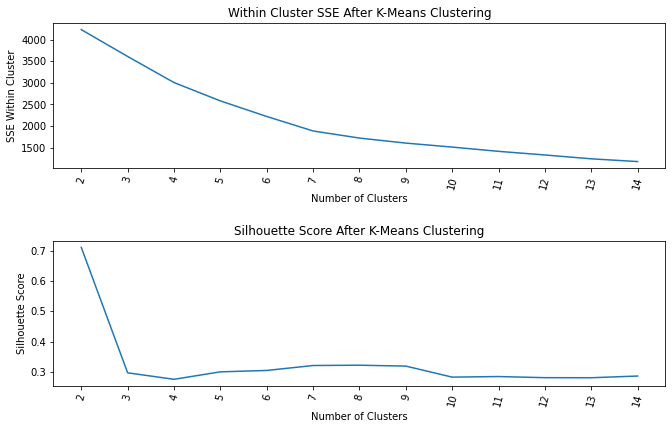

In [123]:
plot_cluster(df_in_sub_2, max_loop=15)


In [134]:
third_trial = apply_cluster(df_in_sub_2, clusters=10)


clustering performance
-----------------------------------
silhouette score: 0.28
sse withing cluster: 1511


In [135]:
sec_best_sub_cluster_perf = (    
    third_trial
    .groupby('cluster')
    .agg({"Annual_Average_Pay":"mean", "rent":"mean","payrentratio":"mean", "Ticker":"count"})
    .sort_values('payrentratio')
    .reset_index()
)
sec_best_sub_cluster_perf


,cluster,Annual_Average_Pay,rent,payrentratio,Ticker
0,4,121563.260274,19924.674966,0.164936,73
1,7,155821.390244,25466.739078,0.165036,41
2,2,64097.542773,11152.398619,0.174273,339
3,5,45926.519651,9671.026050,0.212915,229
4,9,134147.0,28356.108816,0.213072,31
5,6,57345.007273,13224.968731,0.232121,275
6,0,53085.612536,13097.475921,0.247779,351
7,1,106599.233333,27954.935862,0.263618,90
8,8,60901.67036,16104.426526,0.265329,361
9,3,121371.869565,42097.868085,0.351591,23


In [143]:
cluster_ids=sec_best_sub_cluster_perf.loc[sec_best_sub_cluster_perf['payrentratio']<0.3]['cluster']
ids=cluster_ids.unique()
ids

array([4, 7, 2, 5, 9, 6, 0, 1, 8])

In [144]:
df_selected = df_in_sub_2[df_in_sub_2["cluster"].isin(ids)]
df_selected

,Ticker,rent,Annual_Average_Pay,Annual_Average_Employment,payrentratio,cluster
0,AL_Coffee County_financial activities,14411.739916,60386,545,0.23866,8
1,AL_Dale County_goods-producing,10360.691741,74398,4674,0.13926,2
2,AL_Dale County_natural resources and mining,10360.691741,43268,83,0.239454,5
3,AL_Dale County_construction,10360.691741,51642,530,0.200625,5
4,AL_Dale County_service-providing,10360.691741,48345,7718,0.214307,5
...,...,...,...,...,...,...
1808,WY_Natrona County_education and health services,14446.272748,56019,6034,0.257882,0
1809,WY_Sweetwater County_construction,13982.275823,58188,1280,0.240295,0
1810,"WY_Sweetwater County_trade, transportation, an...",13982.275823,50316,4085,0.277889,0
1811,WY_Sweetwater County_financial activities,13982.275823,55053,552,0.253978,0


In [147]:
df_selected_tickers=df_selected['Ticker'].unique()
df_selected_tickers

array(['AL_Coffee County_financial activities',
       'AL_Dale County_goods-producing',
       'AL_Dale County_natural resources and mining', ...,
       'WY_Sweetwater County_trade, transportation, and utilities',
       'WY_Sweetwater County_financial activities',
       'WY_Sweetwater County_professional and business services'],
      dtype=object)

In [148]:
def set_best(x):
  if(x['Ticker'] in best_tickers):
    return 'BEST'
  elif x['Ticker'] in df_selected_tickers:
    return 'GOOD'
  elif (x['Annual_Average_Pay']!=0 and x['rent']/x['Annual_Average_Pay'])>=0.3:
    return 'BAD'
  else:
    return 'CONSIDER'
df['decision']=df.apply(lambda x:set_best(x),axis=1)
df

,State,County,latitude,longitude,rent,Annual_Average_Employment,Annual_Average_Pay,Industry,NAICS,State_Name_Full,Ticker,decision
0,AL,Autauga County,32.532237,-86.646439,1593.302056,2129,61660,goods-producing,101,Alabama,AL_Autauga County_goods-producing,CONSIDER
1,AL,Autauga County,32.532237,-86.646439,1593.302056,176,72310,natural resources and mining,1011,Alabama,AL_Autauga County_natural resources and mining,CONSIDER
2,AL,Autauga County,32.532237,-86.646439,1593.302056,468,50631,construction,1012,Alabama,AL_Autauga County_construction,CONSIDER
3,AL,Autauga County,32.532237,-86.646439,1593.302056,1485,63874,manufacturing,1013,Alabama,AL_Autauga County_manufacturing,CONSIDER
4,AL,Autauga County,32.532237,-86.646439,1593.302056,6478,37274,service-providing,102,Alabama,AL_Autauga County_service-providing,CONSIDER
...,...,...,...,...,...,...,...,...,...,...,...,...
9468,WY,Sweetwater County,41.660328,-108.875677,1165.189652,1037,50567,professional and business services,1024,Wyoming,WY_Sweetwater County_professional and business...,GOOD
9469,WY,Sweetwater County,41.660328,-108.875677,1165.189652,1320,34963,education and health services,1025,Wyoming,WY_Sweetwater County_education and health serv...,CONSIDER
9470,WY,Sweetwater County,41.660328,-108.875677,1165.189652,2320,17833,leisure and hospitality,1026,Wyoming,WY_Sweetwater County_leisure and hospitality,CONSIDER
9471,WY,Sweetwater County,41.660328,-108.875677,1165.189652,432,35212,other services,1027,Wyoming,WY_Sweetwater County_other services,CONSIDER


In [149]:
df.to_csv('processed_df.csv')

In [150]:
output_dataset_id='zillow_property_value'

output_table_id = 'DataClassified' 

replace_or_append_output = 'replace' #['replace', 'append']

# Combine project and dataset
project_dataset = (client.project + '.' + output_dataset_id)

# Check to make sure output dataset exists, create it if not
try:
  client.get_dataset(output_dataset_id)
  print("Dataset " + project_dataset + " exists\n")
 
except:
  print("Dataset " + project_dataset + " doesn't exist, so creating it\n")
  dataset = client.create_dataset(bigquery.Dataset(project_dataset))

Dataset dataminingproject-364904.zillow_property_value exists



In [151]:
def createTable(df,output_table_id):
    job_config = bigquery.LoadJobConfig()

    # Modify job config depending on if we want to replace or append to table
    if(replace_or_append_output == 'replace'):
      job_config.write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE  
    else:  
      job_config.write_disposition = bigquery.WriteDisposition.WRITE_APPEND

    dataset_ref = client.dataset(output_dataset_id)
    table_ref = dataset_ref.table(output_table_id)

    # Use client functionality to load BigQuery table from Pandas data frame
    client.load_table_from_dataframe(
    dataframe = df,
    destination = table_ref,
    job_config = job_config
    ).result()
    
    print('Write to bigquery dataset (' + replace_or_append_output + ') to ' + project_dataset + '.' + output_table_id +'\n')
createTable(df,output_table_id)

Write to bigquery dataset (replace) to dataminingproject-364904.zillow_property_value.DataClassified

